 <font color='blue'><h2> 1-DataFrame </h2></font>


In [49]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('data/platine.csv')

In [51]:
df.head()

,titre,sortie_france,box_office,entree_1ere_semaine,acteur_1,acteur_2,acteur_3,duree,realisateur,genre_1,genre_2,genre_3,note_film,franchise_1,franchise_2,pays,annee,vacances
0,en pleine tempête,2000-08-09,1403086,547204,George Clooney,Mark Wahlberg,Diane Lane,129,Wolfgang Petersen,Drame,Action,Catastrophe,5.7,NaN,NaN,Allemagne,2000,False
1,escrocs mais pas trop,2000-12-06,1038868,405159,Woody Allen,Hugh Grant,Tracey Ullman,94,Woody Allen,Comédie,Policier,Comédie,6.5,NaN,NaN,États-Unis,2000,False
2,le prince du pacifique,2000-12-20,1028773,401221,Thierry Lhermitte,Patrick Timsit,Marie Trintignant,90,Alain Corneau,Aventure,Comédie,Aventure,3.9,NaN,NaN,Espagne,2000,True
3,billy elliot,2000-12-20,2514645,980712,Jamie Bell,Julie Walters,Jamie Draven,110,Stephen Daldry,Comédie,Drame,Comédie,7.3,Billy Elliot,NaN,Royaume-Uni,2000,True
4,hollow man - l'homme sans ombre,2000-09-20,1512638,589929,Elisabeth Shue,Kevin Bacon,Josh Brolin,112,Paul Verhoeven,Thriller,Science-fiction,Épouvante-Horreur,5.7,L'Homme invisible,NaN,États-Unis,2000,False


 <font color='blue'><h2> 2-Comparaison Entrées périodes vacances ou pas</h2></font>


In [52]:
# Utiliser groupby() pour regrouper le DataFrame par la colonne 'vacances' et calculer la moyenne de 'entree_1ere_semaine'
moyenne_par_vacances = df.groupby('vacances')['entree_1ere_semaine'].mean()

# Afficher la moyenne par vacances
print(moyenne_par_vacances)


vacances
False    305965.852530
True     347781.581182
Name: entree_1ere_semaine, dtype: float64


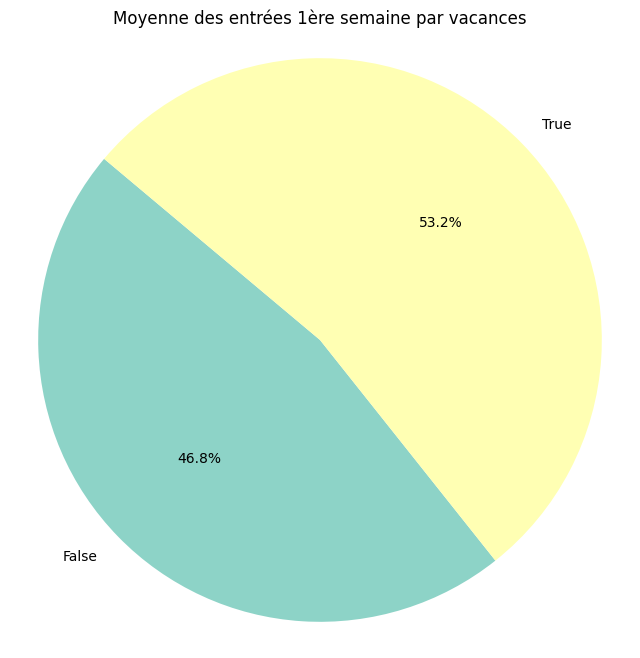

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer un DataFrame à partir du résultat
df_moyennes = moyenne_par_vacances.reset_index()

# Définir les données pour le pie chart
valeurs = df_moyennes['entree_1ere_semaine']
labels = df_moyennes['vacances']
couleurs = plt.cm.Set3.colors  # Vous pouvez changer les couleurs ici en utilisant d'autres palettes

# Créer le pie chart
plt.figure(figsize=(8, 8))  # Réglez la taille du diagramme en fonction de vos préférences
plt.pie(valeurs, labels=labels, colors=couleurs, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Permet de s'assurer que le diagramme est circulaire
plt.title('Moyenne des entrées 1ère semaine par vacances')
plt.show()



 <font color='blue'><h2> 3-Entrées et durées </h2></font>


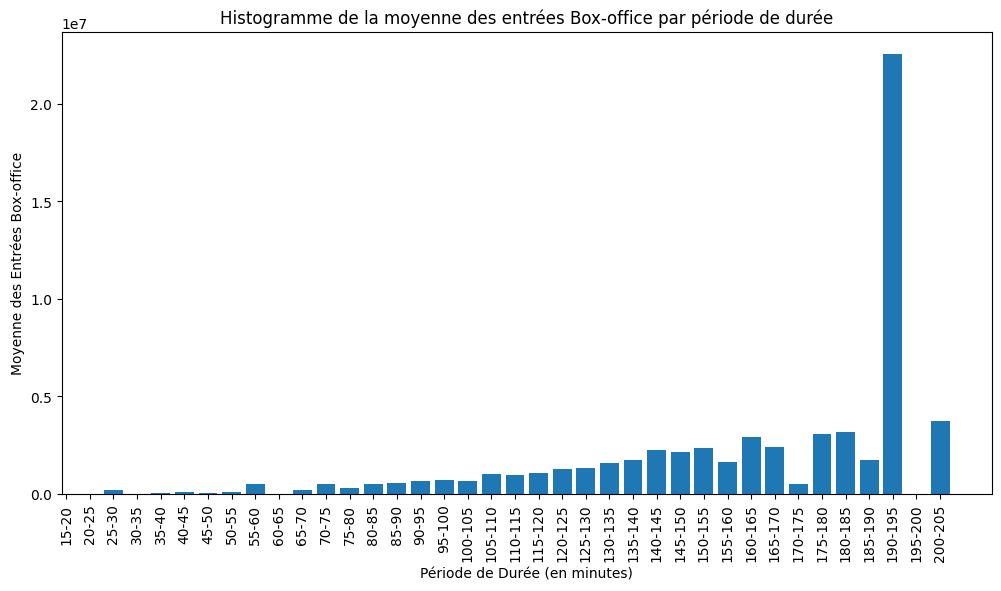

In [54]:
# Créez des bins de largeur 5 pour la colonne 'duree'
bins = list(range(df['duree'].min(), df['duree'].max() + 6, 5))
labels = [f"{i}-{i+5}" for i in bins[:-1]]  # Créez des labels pour chaque bin

# Ajoutez une nouvelle colonne indiquant la période de durée à laquelle chaque film appartient
df['periode_duree'] = pd.cut(df['duree'], bins=bins, labels=labels)

# Calculez la moyenne des entrées 'box_office' pour chaque groupe de films basé sur la colonne 'periode_duree'
moyennes_par_periode = df.groupby('periode_duree')['box_office'].mean()

# Créer l'histogramme à partir des périodes de durée et de leurs moyennes d'entrées 'box_office'
plt.figure(figsize=(12, 6))  # Réglez la taille du graphique en fonction de vos préférences
plt.bar(moyennes_par_periode.index, moyennes_par_periode.values)
plt.xlabel('Période de Durée (en minutes)')
plt.ylabel('Moyenne des Entrées Box-office')
plt.title('Histogramme de la moyenne des entrées Box-office par période de durée')
plt.xticks(rotation=90)  # Inclinez les étiquettes pour les rendre lisibles
plt.show()


In [55]:
#verification
df[(df['duree'] > 190) & (df['duree'] <= 195)]['box_office'].mean()
df[(df['duree'] > 140) & (df['duree'] <= 145)]['box_office'].mean()

2257290.3333333335


 <font color='blue'><h2> 4-Distribution normale nombre des fimes par durée </h2></font>


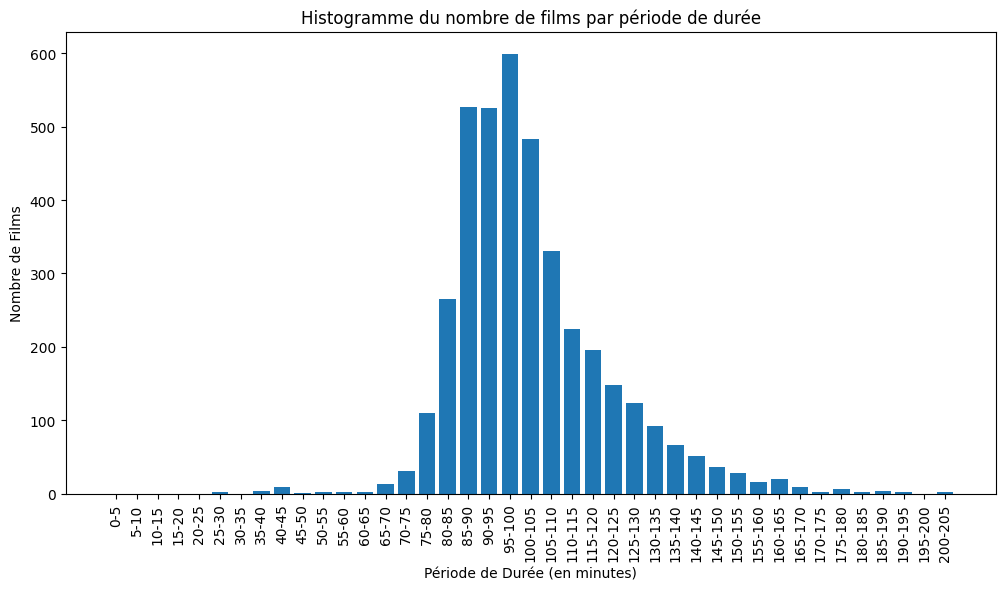

In [56]:
# Créez des bins de largeur 5 pour la colonne 'duree'
bins = list(range(df['duree'].min(), df['duree'].max() + 6, 5))
labels = [f"{i}-{i+5}" for i in bins[:-1]]  # Créez des labels pour chaque bin

# Ajoutez une nouvelle colonne indiquant la période de durée à laquelle chaque film appartient
df['periode_duree'] = pd.cut(df['duree'], bins=bins, labels=labels)

# Comptez le nombre de films dans chaque bin de durée
nombre_films_par_periode = df['periode_duree'].value_counts().sort_index()

# Créer l'histogramme à partir du nombre de films dans chaque bin de durée
plt.figure(figsize=(12, 6))  # Réglez la taille du graphique en fonction de vos préférences
plt.bar(nombre_films_par_periode.index, nombre_films_par_periode.values)
plt.xlabel('Période de Durée (en minutes)')
plt.ylabel('Nombre de Films')
plt.title('Histogramme du nombre de films par période de durée')
plt.xticks(rotation=90)  # Inclinez les étiquettes pour les rendre lisibles
plt.show()


In [57]:
df['realisateur'].nunique()

1911

In [60]:
df['franchise_1'].nunique()

1224